In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report,  confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.dummy import DummyClassifier



# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/fake_and_real_news.csv')

# Optional: handle imbalance



# Drop NaN values
df.dropna(inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])  # Converts 'Fake'/'Real' to 0/1

# Splitting dataset
X = df['Text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_tfidf, y_train)
y_dummy_pred = dummy.predict(X_test_tfidf)
print("Dummy Accuracy:", accuracy_score(y_test, y_dummy_pred))



Mounted at /content/drive
Dummy Accuracy: 0.4936026936026936


Training Naive Bayes...
Naive Bayes Accuracy: 0.9626
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1466
           1       0.96      0.97      0.96      1504

    accuracy                           0.96      2970
   macro avg       0.96      0.96      0.96      2970
weighted avg       0.96      0.96      0.96      2970



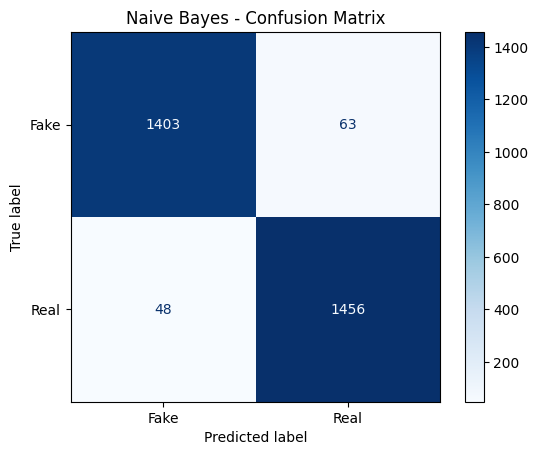

Training SVM...
SVM Accuracy: 0.9976
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1466
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970



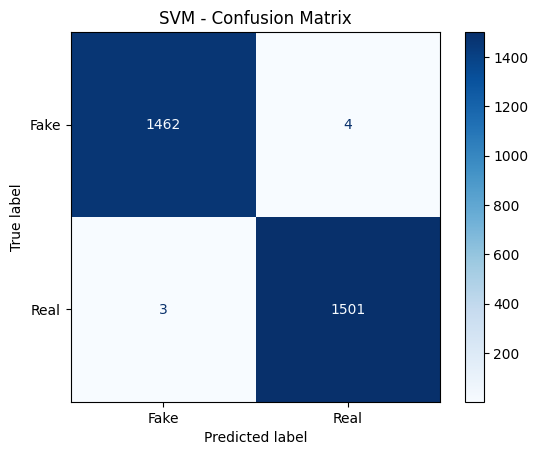

Training Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree Accuracy: 0.9976
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1466
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970



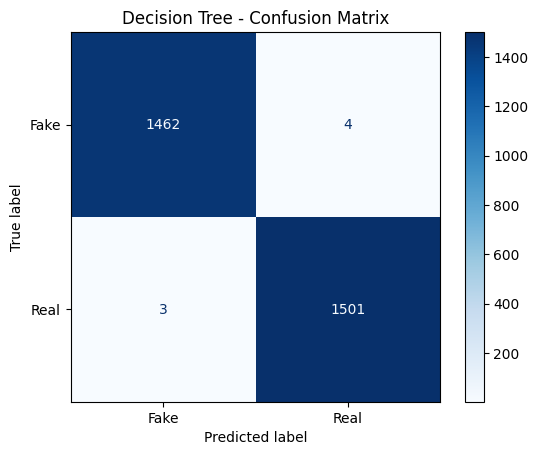

Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Accuracy: 0.9987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1466
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970



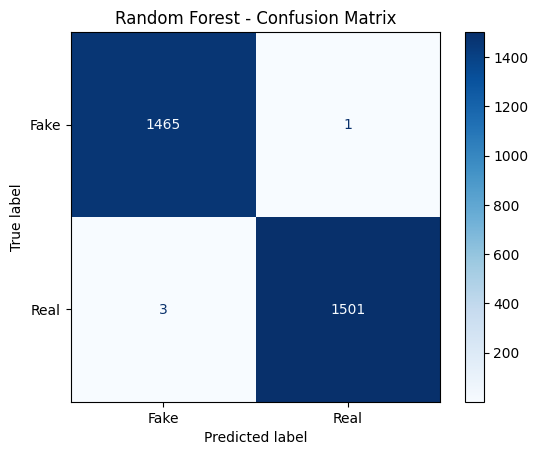

Training AdaBoost...
AdaBoost Accuracy: 0.9987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1466
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970



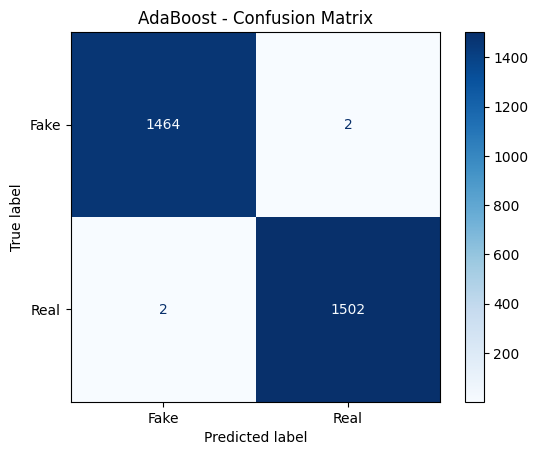

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:05:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1466
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970



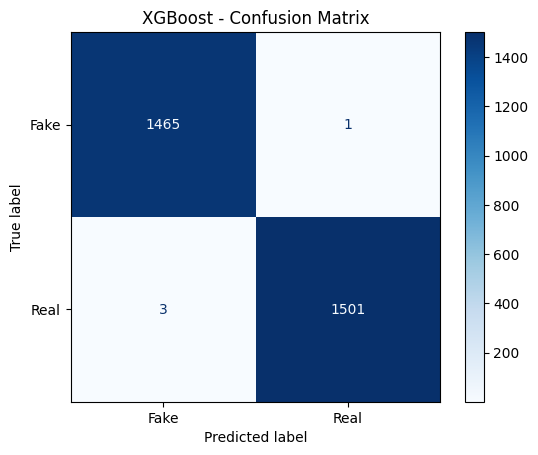

Training MLP...
MLP Accuracy: 0.9943
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1466
           1       0.99      1.00      0.99      1504

    accuracy                           0.99      2970
   macro avg       0.99      0.99      0.99      2970
weighted avg       0.99      0.99      0.99      2970



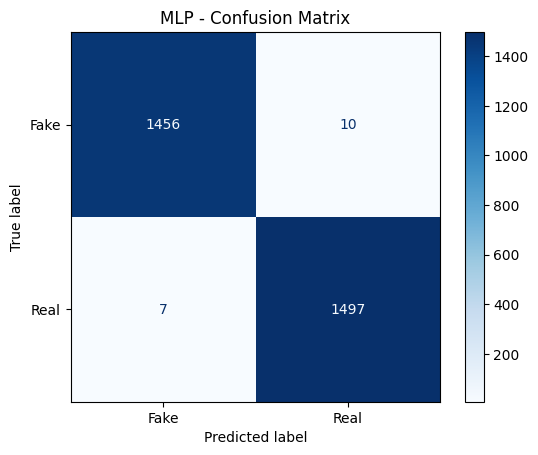


Final Results:
Naive Bayes: 0.9626
SVM: 0.9976
Decision Tree: 0.9976
Random Forest: 0.9987
AdaBoost: 0.9987
XGBoost: 0.9987
MLP: 0.9943


In [ ]:
# Define classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(max_iter=300)
}

# Hyperparameter tuning setup
param_grid = {
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Decision Tree": {'max_depth': [10, 20, 30]},
    "Random Forest": {'n_estimators': [50, 100, 200]},
    "MLP": {'hidden_layer_sizes': [(50,), (100,), (50,50)], 'activation': ['relu', 'tanh']}
}

# Train and evaluate models
results = {}
for name, model in classifiers.items():
    print(f"Training {name}...")
    if name in param_grid:
        search = RandomizedSearchCV(model, param_grid[name], n_iter=5, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
        search.fit(X_train_tfidf, y_train)
        model = search.best_estimator_
    else:
        model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

    results[name] = acc


# Display results
print("\nFinal Results:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=500)
X_test_pad = pad_sequences(X_test_seq, maxlen=500)

# Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=500))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 68s 572ms/step - accuracy: 0.9254 - loss: 0.3553 - val_accuracy: 0.9990 - val_loss: 0.0095
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 57s 521ms/step - accuracy: 0.9983 - loss: 0.0113 - val_accuracy: 0.9990 - val_loss: 0.0060
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 81s 507ms/step - accuracy: 0.9996 - loss: 0.0040 - val_accuracy: 0.9987 - val_loss: 0.0070
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 62s 566ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9987 - val_loss: 0.0057
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 84s 583ms/step - accuracy: 1.0000 - loss: 7.0947e-04 - val_accuracy: 0.9987 - val_loss: 0.0066


In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")
print(classifier("The news is completely fabricated."))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9996045231819153}]


In [ ]:
trained_models = {}  # Add this before the loop

for name, model in classifiers.items():
    print(f"Training {name}...")

    if name in param_grid:
        search = RandomizedSearchCV(model, param_grid[name], n_iter=5, cv=3, scoring='accuracy', n_jobs=-1)
        search.fit(X_train_tfidf, y_train)
        model = search.best_estimator_
    else:
        model.fit(X_train_tfidf, y_train)

    trained_models[name] = model  # ✅ Save the fitted model here!

    y_pred = model.predict(X_test_tfidf)
    ...


Training Naive Bayes...
Training SVM...
Training Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training AdaBoost...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training MLP...


In [ ]:
rf_model = trained_models["Random Forest"]
xgb_model = trained_models["XGBoost"]


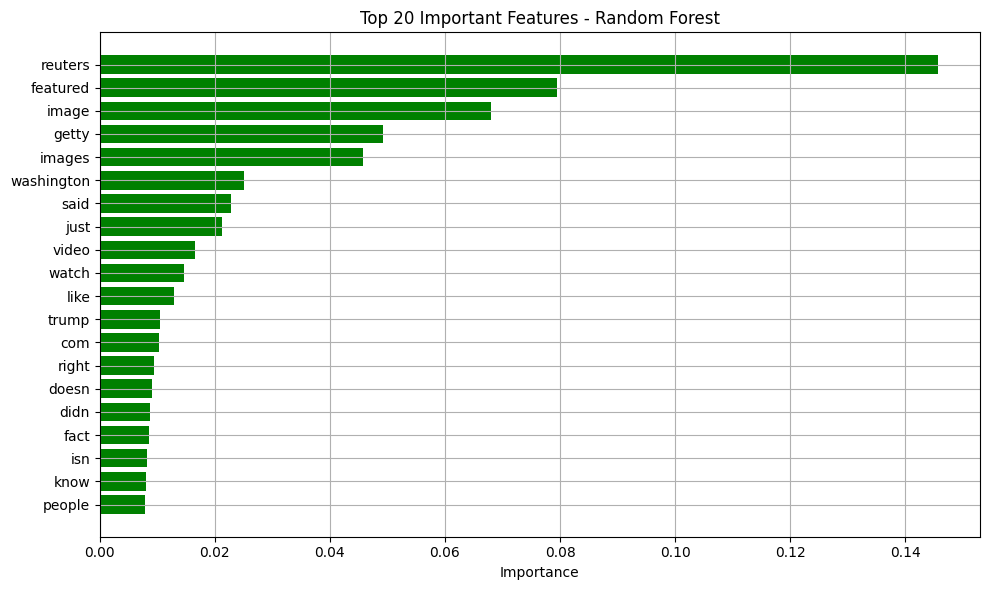

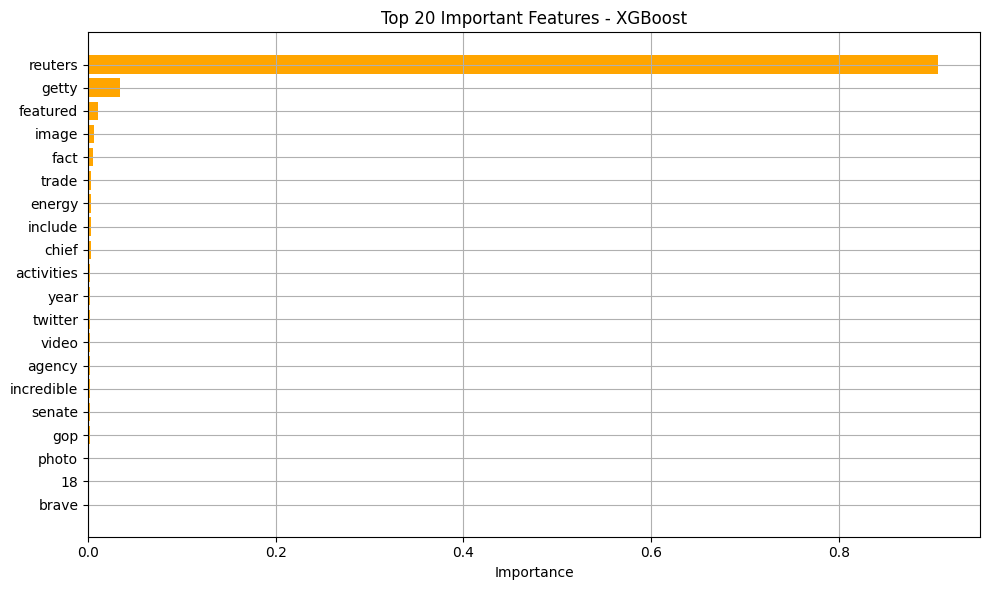

In [ ]:
feature_names = tfidf.get_feature_names_out()

# --- Random Forest ---
rf_model = trained_models["Random Forest"]
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[-20:]
rf_top_features = [feature_names[i] for i in rf_indices]

plt.figure(figsize=(10, 6))
plt.barh(rf_top_features, rf_importances[rf_indices], color='green')
plt.xlabel("Importance")
plt.title("Top 20 Important Features - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- XGBoost ---
xgb_model = trained_models["XGBoost"]
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[-20:]
xgb_top_features = [feature_names[i] for i in xgb_indices]

plt.figure(figsize=(10, 6))
plt.barh(xgb_top_features, xgb_importances[xgb_indices], color='orange')
plt.xlabel("Importance")
plt.title("Top 20 Important Features - XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example text data (replace this with your actual training data)
texts = ["This is fake news", "This is real news", "Another fake headline"]

# Create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)


In [ ]:
from sklearn.svm import SVC

# Example labels (replace with your actual y values)
y = [0, 1, 0]  # 0 for fake, 1 for real
# Train SVM classifier
svm_model = SVC(probability=True)
svm_model.fit(X, y)


# Save using joblib
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(svm_model, 'svm_model.pkl')


['svm_model.pkl']

In [39]:
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(svm_model, 'svm_model.pkl')


['svm_model.pkl']